# Harris's Economic Order Quantity Model

We use this model throughout our documentation so we want to make sure how `econsa` is useful in its analysis. We simply import the core function from `tespy`.

In [2]:
import numpy as np
import chaospy as cp
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from temfpy.uncertainty_quantification import eoq_harris  # noqa: F401

We start with the uncertainty propagation. First, we need to generate the data from uniform distribution. To obtain uncertainty, we use the `sample` function from `chaospy`.

In [4]:
seed = 123
n = 10000

x_min_multiplier = 0.9
x_max_multiplier = 1.1
m_0 = 1230
s_0 = 0.0135
c_0 = 2.15
r = 0.1

In [5]:
np.random.seed(seed)
m = cp.Uniform(x_min_multiplier * m_0, x_max_multiplier * m_0).sample(n, rule="random")
s = cp.Uniform(x_min_multiplier * s_0, x_max_multiplier * s_0).sample(n, rule="random")
c = cp.Uniform(x_min_multiplier * c_0, x_max_multiplier * c_0).sample(n, rule="random")

x = np.array([m, s, c])
y = eoq_harris(x, r)

Now, we can plot the data. The `tight_layout` function is needed to show all axis labels.

<Figure size 432x288 with 0 Axes>

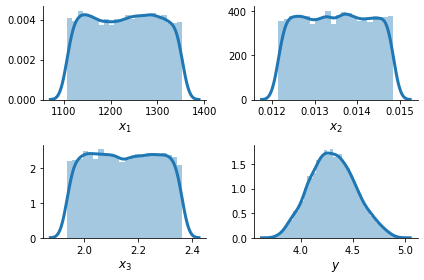

In [12]:
plt.clf()
fig, ax = plt.subplots(2, 2)

sns.distplot(m, ax=ax[0, 0])
ax[0, 0].set_xlabel(r"$x_1$")

sns.distplot(s, ax=ax[0, 1])
ax[0, 1].set_xlabel(r"$x_2$")

sns.distplot(c, ax=ax[1, 0])
ax[1, 0].set_xlabel(r"$x_3$")

sns.distplot(y, ax=ax[1, 1])
ax[1, 1].set_xlabel(r"$y$")

fig.tight_layout()
plt.show()

## Resources

* Harris, F. W. (1990). How Many Parts to Make at Once. Operations Research, 38(6), 947–950. https://doi.org/10.1287/opre.38.6.947
* Borgonovo, E., & Plischke, E. (2016). Sensitivity analysis: A review of recent advances. European Journal of Operational Research, 248(3), 869–887. https://doi.org/10.1016/j.ejor.2015.06.032